# AI for Injection Moulding

## Importing Modules

In [1]:
import Helper as hp
import pandas as pd
import matplotlib.pyplot as plt
import os

## Reading Data

### Input Data

In [3]:
input_data = hp.read_input_data()
test_data = hp.read_test_data()
Y = hp.read_Y(os.getcwd()+"/Data/Y1.csv")
features1 = hp.time_series2features(input_data["ramposition"],
                                    input_data["ramposition_time"])

In [123]:
header1 = "Feature"
header2 = "Dimension"
header3 = "Element Data Type"
print(f"{header1:<30}{header2:<20}{header3:<20}")
print("---------------------------------------------------------------------")
for key in input_data.keys():
    print(f"{key:<30}{len(input_data[key]):<20}{str(type(input_data[key][0][0])):<20}")

Feature                       Dimension           Element Data Type   
---------------------------------------------------------------------
ramposition                   1542                <class 'float'>     
ramposition_time              1542                <class 'float'>     
injection_pressure            1542                <class 'float'>     
injection_pressure_time       1542                <class 'float'>     
sensor_pressure               1542                <class 'float'>     
sensor_pressure_time          1542                <class 'float'>     


#### Analysis of Input Data

In [124]:
# Read the data in lists
rpt = input_data["ramposition_time"][0]
rp = input_data["ramposition"][0]
ipt = input_data["injection_pressure_time"][0]
ip = input_data["injection_pressure"][0]
pt = input_data["sensor_pressure_time"][0]
p = input_data["sensor_pressure"][0]

In [121]:
# function to plot the three time series consecutively
def show3_time_series(rpt, rp, ipt, ip, pt, p) -> None:
    """
    rpt, rp: ramposition time, ramposition
    ipt, ip: injection pressure time, injection pressure
    pt, p:   pressure time, pressure
    """
    # defaults are: figsize=(6.4, 4.8) width and height in inches, dpi=100 default
    fs = 20  # fontsize
    lw = 5  # linewidth
    fig = plt.figure(figsize=[30, 10], dpi=100)
    fig.suptitle('Consecutive Time Series Whole Process', fontsize=fs*1.5)
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)
    axs = [ax1, ax2, ax3]
    for ax in axs:
        ax.minorticks_on()
        ax.tick_params('both', length=20, width=2, which='major', labelsize=fs)
        ax.tick_params('both', length=10, width=1, which='minor', labelsize=fs)
        ax.set_xlabel('Time (ms)', fontsize=fs)
    ax1.plot(rpt, rp, color='c', linewidth=lw)
    ax1.set_title('Ram Position', fontsize=fs)
    ax1.set_ylabel('Ram Position', fontsize=fs)
    ax2.plot(ipt, ip, color='y', linewidth=lw)
    ax2.set_title('Injection Pressure', fontsize=fs)
    ax2.set_ylabel('Injection Pressure', fontsize=fs)
    ax2.set(xlabel='Time (ms)', ylabel='Injection Pressure')
    ax3.plot(pt, p, color='purple', linewidth=lw)
    ax3.set_title('Sensor Pressure', fontsize=fs)
    ax3.set_ylabel('Sensor Pressure', fontsize=fs)
    plt.show()

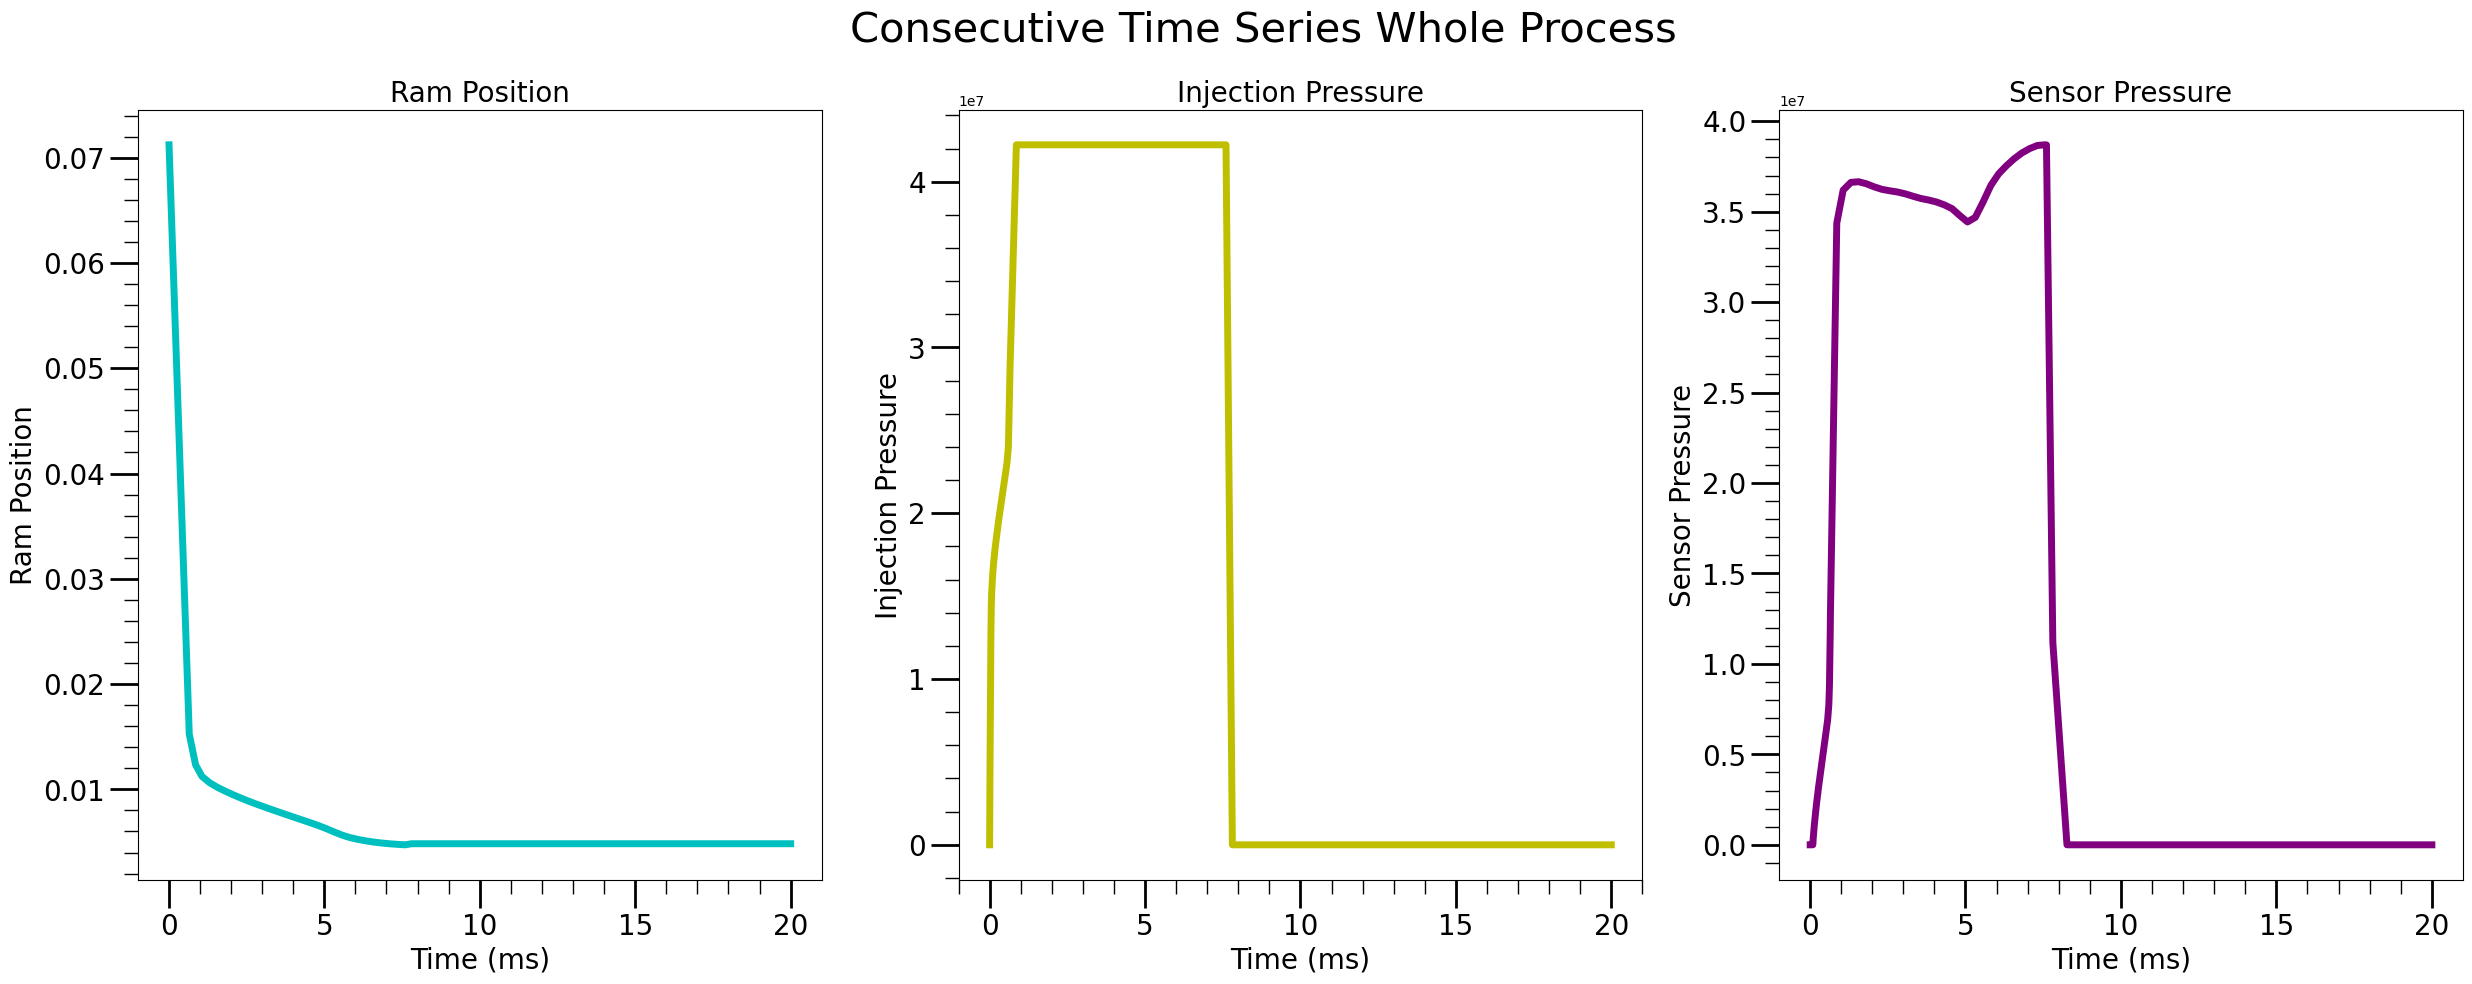

In [122]:
# We print the three consecutive processes:
# ram position, injection pressure, sensor pressure
show3_time_series(rpt, rp, ipt, ip, pt, p)

## Reading Label Data

In [128]:
# There are only 5 labels
# Y1: box opening (in mm), Y2: valid/non-valid, Y3: box weight (in grams)
# Y4: valid/non-valid, Y5: time it took to fill the mould (in seconds)
Y = [[] for _ in range(6)]
base_name = "./Data/Y"
for i in range(5):
    Y[i] = hp.read_Y(base_name + str(i + 1) + ".csv")

# TODO:
- Explore more the input data for varios products (valid, non valid)
- Study the timeseries to feature function